In [1]:
# Import Section
import csv
import codecs
import sys
import io
import numpy as np
import pandas as pd
import scipy as sp
import math

# For Regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from statistics import mean

from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge

# Python script for confusion matrix creation. 
from sklearn.metrics import *
from numpy import mean
from numpy import std
from sklearn import metrics

In [2]:
dataset=pd.read_excel("Des_cod_1056_92-29.xlsx",index_col=0)

In [3]:
dataset.shape

(1056, 30)

In [4]:
# to check the null values 
dataset.isnull().sum()

Number of atoms                                                   0
Relative number of N  atoms                                       0
Relative number of Cl atoms                                       0
Wiener index                                                      0
Kier&Hall index (order 3)                                         0
Average Information content (order 0)                             0
Balaban index                                                     0
Max partial charge for a N  atom [Zefirov's PC]                   0
Min partial charge for a N  atom [Zefirov's PC]                   0
Polarity parameter / square distance                              0
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                 0
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                 0
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]    0
LUMO energy                                                       0
LUMO+1 energy                                   

In [5]:
dataset.isnull().count()

Number of atoms                                                   1056
Relative number of N  atoms                                       1056
Relative number of Cl atoms                                       1056
Wiener index                                                      1056
Kier&Hall index (order 3)                                         1056
Average Information content (order 0)                             1056
Balaban index                                                     1056
Max partial charge for a N  atom [Zefirov's PC]                   1056
Min partial charge for a N  atom [Zefirov's PC]                   1056
Polarity parameter / square distance                              1056
PPSA-3 Atomic charge weighted PPSA [Zefirov's PC]                 1056
PNSA-3 Atomic charge weighted PNSA [Zefirov's PC]                 1056
RNCS Relative negative charged SA (SAMNEG*RNCG) [Zefirov's PC]    1056
LUMO energy                                                       1056
LUMO+1

In [6]:
x = dataset.drop(['Act'],axis=1).astype (float)
y = dataset['Act']

In [7]:
x.shape

(1056, 29)

In [8]:
y

Structure
"1Co"       0.853
"2Co"       0.987
"3Co"       0.773
"4Co"       0.760
"5Co"       0.893
            ...  
"1052Co"    0.370
"1053Co"    1.020
"1054Co"    0.832
"1055Co"    0.701
"1056Co"    1.090
Name: Act, Length: 1056, dtype: float64

In [9]:
print(type(x))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [10]:
## to overcome the problem input contains nan infinity or a value too large for dtype('float64').
## We need to cinvert the pandas dataframe to numpy array 
#X = np.nan_to_num(X1)
#Y = np.nan_to_num(y)

In [11]:
#X

In [12]:
#Y

In [13]:
#Y.shape

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2, random_state = 47, shuffle=True)

In [15]:
x_train.shape

(844, 29)

In [16]:
x_test.shape

(212, 29)

In [17]:
regressor = LinearRegression(fit_intercept=True,
    normalize=False,
    copy_X=True,
    n_jobs=-1,
    positive=False)

In [18]:
 regressor.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

In [19]:
# compute the testing accuracy
y_pred = regressor.predict(x_test)

In [20]:
y_pred_train = regressor.predict(x_train)

In [21]:
y_pred_train.shape

(844,)

In [22]:
  print("\n")
  print("overall Performance: ", )



overall Performance: 


In [23]:
  # model evaluation for test set
  mae = metrics.mean_absolute_error(y_test, y_pred)
  mse = metrics.mean_squared_error(y_test, y_pred)
  r2 = metrics.r2_score(y_test, y_pred)
  rmse = round(math.sqrt(mse),4)

In [24]:
print("The model performance for test set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for test set
--------------------------------------
MAE is 0.3003140081489216
MSE is 0.4057
R2 score is 0.3694972978713076


In [25]:
  # model evaluation for training set
maeTrain = metrics.mean_absolute_error(y_train, y_pred_train)
mseTrain = metrics.mean_squared_error(y_train, y_pred_train)
r2Train = metrics.r2_score(y_train, y_pred_train)
rmseTrain = round(math.sqrt(mseTrain),4)

In [26]:
print("The model performance for training set")
print("--------------------------------------")
print('MAE is {}'.format(maeTrain))
print('MSE is {}'.format(rmseTrain))
print('R2 score is {}'.format(r2Train))

The model performance for training set
--------------------------------------
MAE is 0.29165158225522103
MSE is 0.3869
R2 score is 0.35180765933422586


In [27]:
cvscoretrain = (cross_val_score(regressor,x_train,y_train.ravel(),cv=5).mean())

In [28]:
print("The CV score for training set")
print("--------------------------------------")
print (cross_val_score(regressor,x_train,y_train.ravel(),cv=5))
print('Q2 is {}'.format(cvscoretrain))

The CV score for training set
--------------------------------------
[0.32884218 0.23210762 0.32001244 0.27275549 0.2880272 ]
Q2 is 0.2883489862239066


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

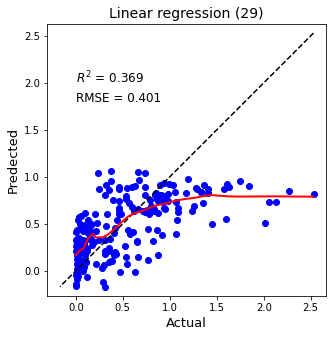

In [30]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o', linewidth=1)
plt.yscale('linear')
plt.xscale('linear')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], c='black', linestyle='dashed')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.369', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.401', fontsize = 12)
plt.title('Linear regression (29)', fontsize = 14)

# Draw a Loess best-fit line over the scatter plot
lowess = sm.nonparametric.lowess
loess_fit = lowess(y_pred, y_test, frac=0.3)
# Plot the loess fit line on the scatter plot
plt.plot(loess_fit[:, 0], loess_fit[:, 1], 'r-', linewidth=2)

plt.show()

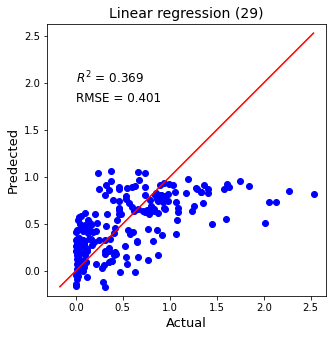

In [31]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'red')
plt.xlabel('Actual', fontsize=13)
plt.ylabel('Predected', fontsize=13)
plt.axis('equal')
plt.text(0, 2, '$R^2$ = 0.369', fontsize = 12)
plt.text(0, 1.8, 'RMSE = 0.401', fontsize = 12)
plt.title('Linear regression (29)', fontsize = 14)
plt.show()